# Lập trình giải bài toán quy hoạch tuyến tính (Linear programming)

 **Tham khảo từ thầy Doãn Minh Đăng**

## Công thức mô tả bài toán LP

Phát biểu dạng bài toán cực tiểu hóa:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{min}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$

hoặc phát biểu dạng bài toán cực đại hóa:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{max}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$


## Ví dụ một vấn đề có thể chuyển thành bài toán LP

Tình huống: Một công ty kinh doanh thương mại chuẩn bị cho một đợt khuyến mãi nhằm thu hút khách hàng bằng cách tiến hành quảng cáo sản phẩm của công ty trên hệ thống phát thanh và truyền hình.

Chi phí cho 1 phút quảng cáo trên sóng phát thanh là 80.000đ, trên sóng truyền hình là 400.000đ.

Đài phát thanh chỉ nhận phát các chương trình quảng cáo dài ít nhất là 5 phút.

Do nhu cầu quảng cáo trên truyền hình rất lớn nên đài truyền hình chỉ nhận phát các chương trình dài tối đa 4 phút.

Theo các phân tích xã hội học, cùng thời lượng 1 phút quảng cáo, trên truyền hình sẽ có hiệu quả gấp 6 lần trên sóng phát thanh.

Công ty dự định chi tối đa là 1.600.000đ cho quảng cáo.

Công ty nên đặt thời lượng quảng cáo trên sóng phát thanh và truyền hình như thế nào để hiệu quả nhất?

### Mô hình hóa bài toán ví dụ:

Xác định biến số:

$\mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] $


trong đó $x_1$ là số phút phát quảng cáo trên đài phát thanh, $x_2$ là số phút phát quảng cáo trên truyền hình

Diễn đạt bài toán thành công thức:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{max}} \quad & x_1 + 6x_2 \\
\text{subject to} \quad & x_1 \ge 5 \\
 & x_2 \le 4 \\
 & 80000x_1 + 400000x_2 \le 1600000
 \end{align}
$

(thực tế còn có điều kiện nữa, là $x_1$ và $x_2$ không âm)

#### Vẽ đồ thị tập khả thi tương ứng với các ràng buộc

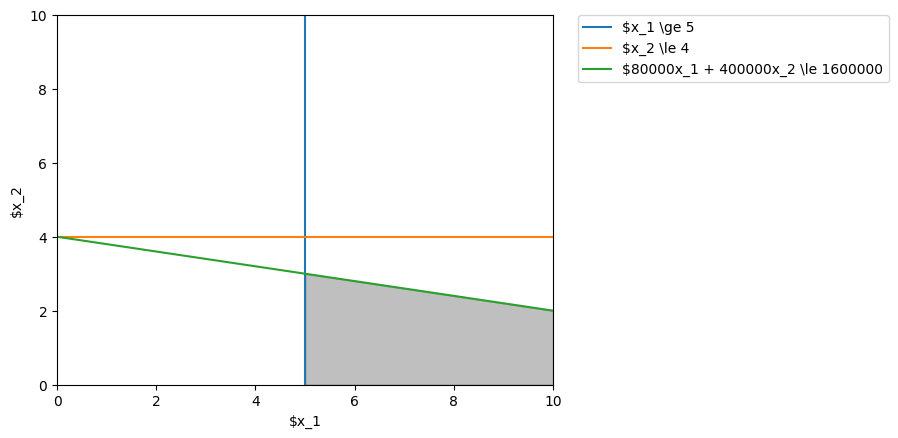

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Construct lines
# x >= 0
x = np.linspace(0, 10, 1000)
# x >= 5
x1 = (x*0) + 5
# y >= 0
y2 = x
# y <= 4
y3 = (x*0) + 4
# 400000y <= 1600000 - 80000x
y4 = (1600000 - 80000*x)/400000

# make plot
plt.plot(x1, y2, label=r'$x_1 \ge 5')
plt.plot(x, y3, label=r'$x_2 \le 4')
plt.plot(x, y4, label=r'$80000x_1 + 400000x_2 \le 1600000')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1')
plt.ylabel(r'$x_2')

# fill feasible region
y5 = np.minimum(y3, y4)
plt.fill_between(x, y5, where=x>5, color='grey', alpha=0.5)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


## Lập trình Python để mô tả bài toán và giải

#### Using PuLP

In [ ]:
import pulp

# Create the LP problem
prob = pulp.LpProblem("Example_LP_Problem", pulp.LpMaximize)

# Define the decision variables
x1 = pulp.LpVariable("x1", lowBound=0)
# if x1 must be an integer: x1 = pulp.LpVariable("x1", lowBound=0, cat="Integer")
x2 = pulp.LpVariable("x2", lowBound=0)

# Set the objective function
prob += x1 + 6 * x2

# Add constraints
prob += x1 >= 5
prob += x2 <= 4
prob += 80000 * x1 + 400000 * x2 <=1600000

# Solve the LP problem
status = prob.solve()

# Print the solution
print(f"Status: {pulp.LpStatus[status]}")
print(f"Optimal value: {pulp.value(prob.objective)}")
print(f"Optimal solution: x1 = {x1.varValue}, x2 = {x2.varValue}")


Status: Optimal
Optimal value: 23.0
Optimal solution: x1 = 5.0, x2 = 3.0


#### Using Pyomo

In [ ]:
# To install glpk solver:
# apt install python3.9-dev libglpk-dev libgmp3-dev
# pip3 install glpk
# apt install glpk-utils

#import sys
#sys.path.append('~/.local/lib/python3.9/site-packages') # so that glpk path is included in path

from pyomo.environ import *

# Create the model
model = ConcreteModel()

# Define the decision variables
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Define the objective function
model.obj = Objective(expr=model.x1 + 6*model.x2, sense=maximize)

# Define the constraints
model.con1 = Constraint(expr=model.x1 >= 5)
model.con2 = Constraint(expr=model.x2 <= 4)
model.con3 = Constraint(expr=80000 * model.x1 + 400000 * model.x2 <= 1600000)

# Solve the linear programming problem
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(model)

# Print the solution
print(f"Optimal value: {model.obj()}")
print(f"Optimal solution: x1 = {model.x1()}, x2 = {model.x2()}")


Optimal value: 23.0
Optimal solution: x1 = 5.0, x2 = 3.0


#### Using Scipy

Ta dùng gói linprog trong thư viện scipy.optimize. **Lưu ý**: linprog quy ước giải bài toán cực tiểu hóa (minimize), nên khi ta muốn giải bài toán maximize thì khai báo là minimize số đối của nó.

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{min}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Define the objective function
c = [-1, -6]

# Define the inequality constraints
Aineq = [[-1, 0], [0, 1], [80000, 400000]]
bineq = [-5, 4, 1600000]

# Define the bounds on the variables
x1_bounds = (0, None)
x2_bounds = (0, None)

# Solve the linear programming problem
res = linprog(c, A_ub=Aineq, b_ub=bineq, bounds=[x1_bounds, x2_bounds],
             options={"disp": True})


In [ ]:

# Print the solution
print(f"Optimal value: {res.fun}")
print(f"Optimal solution: x1 = {res.x[0]}, x2 = {res.x[1]}")


Optimal value: -23.0
Optimal solution: x1 = 5.0, x2 = 3.0


In [ ]:
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -23.0
              x: [ 5.000e+00  3.000e+00]
            nit: 0
          lower:  residual: [ 5.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00  0.000e+00]
                 marginals: [-2.000e-01 -0.000e+00 -1.500e-05]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0